# Árbol de decisión para determinar la especie de un pingüino

## Obtener datos

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
datos = pd.read_csv("penguins_size.csv")

## Exploración de datos

In [3]:
datos.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [4]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [5]:
datos.isna().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [6]:
#Porcentaje de eliminados
print(10/344)

0.029069767441860465


In [7]:
datos = datos.dropna()

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [9]:
datos['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [10]:
datos['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [11]:
datos['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

In [12]:
a = datos[datos['sex'] == '.']

In [13]:
print(a)

    species  island  culmen_length_mm  culmen_depth_mm  flipper_length_mm  \
336  Gentoo  Biscoe              44.5             15.7              217.0   

     body_mass_g sex  
336       4875.0   .  


In [14]:
datos = datos[datos['sex'] != '.']

In [15]:
datos['sex'].unique()

array(['MALE', 'FEMALE'], dtype=object)

<Axes: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

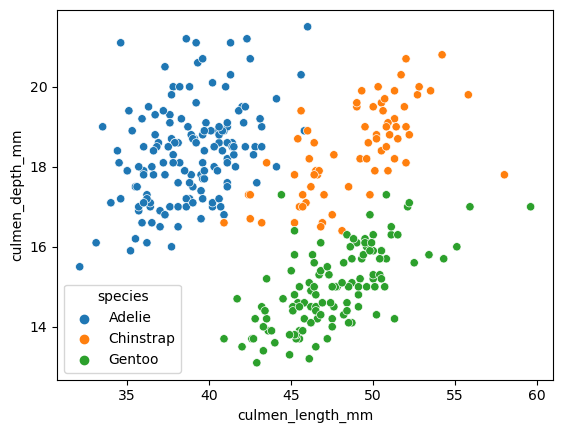

In [16]:
sns.scatterplot(x="culmen_length_mm", 
                y="culmen_depth_mm",
                hue="species",
                data = datos)

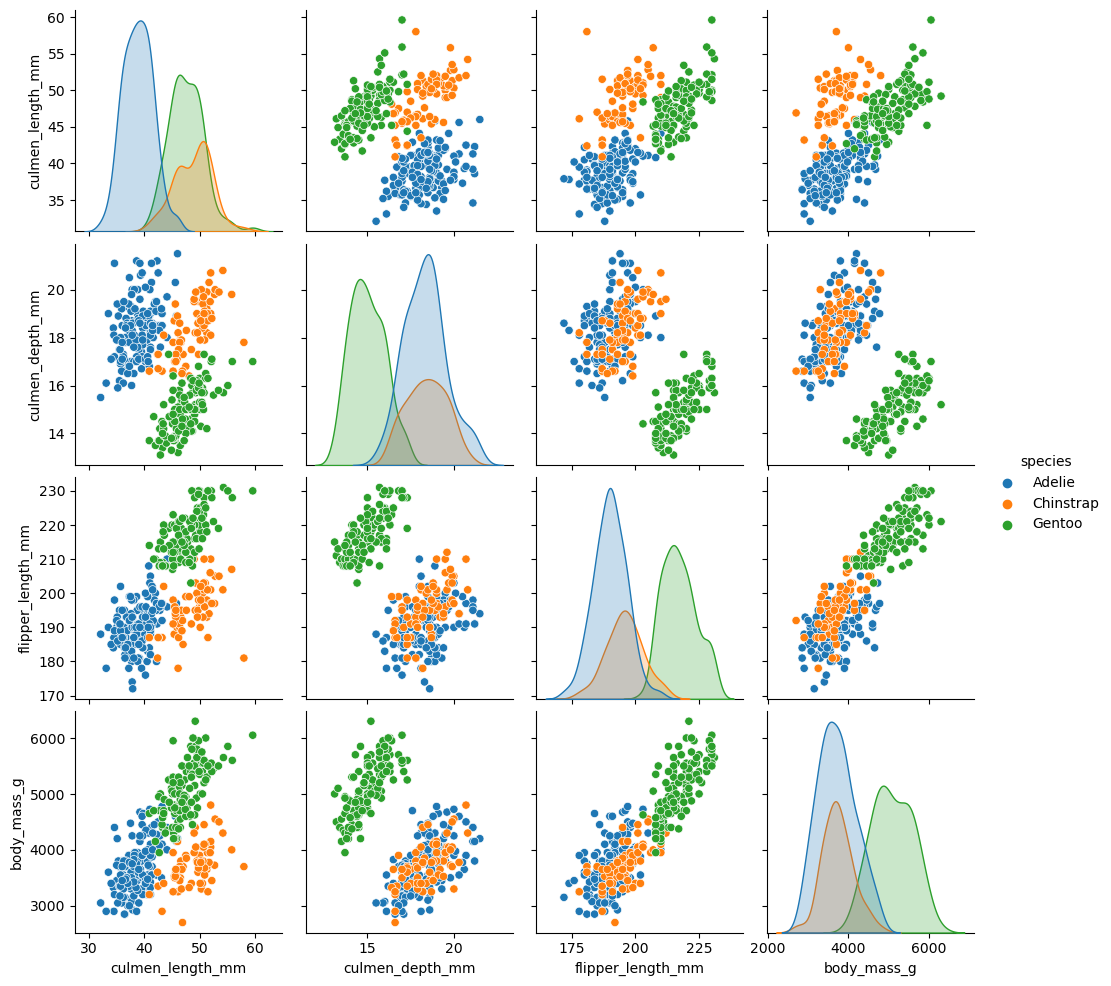

In [17]:
sns.pairplot(datos,hue='species')

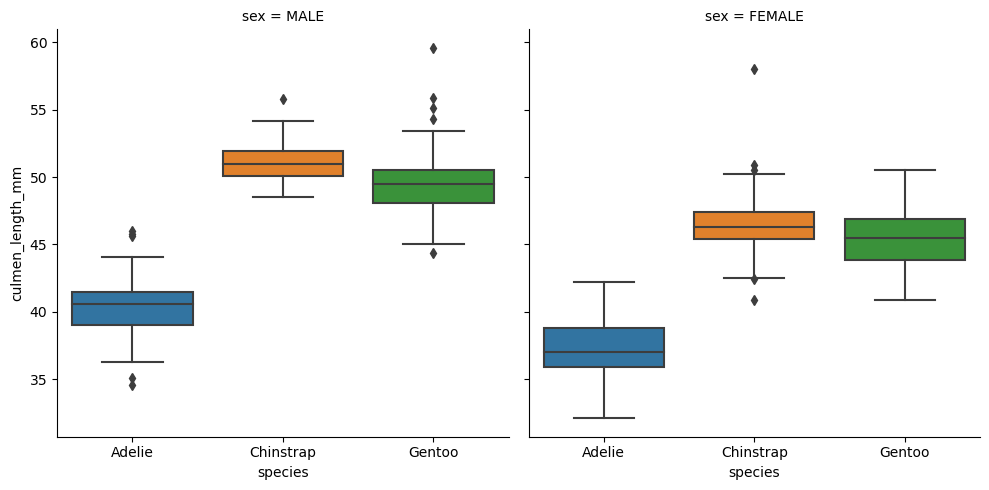

In [18]:
sns.catplot(x='species',y='culmen_length_mm',
            data=datos, kind='box',col='sex')

## Ingeniería de Características

In [19]:
pd.get_dummies(datos)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,species_Adelie,species_Chinstrap,species_Gentoo,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,1,0,0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,1,0,0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,1,0,0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,1,0,0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,1,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,0,0,1,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,1,1,0,0,1,0


In [20]:
pd.get_dummies(datos.drop('species',axis=1))

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
5,39.3,20.6,190.0,3650.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0,0,1,0
340,46.8,14.3,215.0,4850.0,1,0,0,1,0
341,50.4,15.7,222.0,5750.0,1,0,0,0,1
342,45.2,14.8,212.0,5200.0,1,0,0,1,0


In [21]:
pd.get_dummies(datos.drop('species',axis=1),drop_first=True)

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,0,0
340,46.8,14.3,215.0,4850.0,0,0,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,0,0


## División de Datos en conjunto de Entrenamiento y Prueba

In [22]:
X = pd.get_dummies(datos.drop('species',axis=1),drop_first=True)
y = datos['species']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30,random_state=101)

## Clasificador Árbol de decisión

In [25]:
from sklearn.tree import plot_tree

In [26]:
from sklearn.metrics import classification_report,\
confusion_matrix,ConfusionMatrixDisplay

In [27]:
def reporte_modelo(modelo):
    mod_preds = modelo.predict(X_test)
    print(classification_report(y_test,mod_preds))
    print('\n')
    plt.figure(figsize=(12,8),dpi=150)
    plot_tree(modelo,filled=True,feature_names=list(X.columns));
    ConfusionMatrixDisplay.from_estimator(modelo,X_test,y_test,colorbar=False)
    importancia = modelo.feature_importances_
    df_impo = pd.DataFrame(index=X.columns, 
                           data=modelo.feature_importances_,
                           columns=['Importancia de la característica'])
    print(df_impo)

## Evaluación de Modelos

### Hiperparámetros por defecto

In [28]:
from sklearn.tree import DecisionTreeClassifier

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



                   Importancia de la característica
culmen_length_mm                           0.333501
culmen_depth_mm                            0.052680
flipper_length_mm                          0.575758
body_mass_g                                0.000000
island_Dream                               0.038061
island_Torgersen                           0.000000
sex_MALE                                   0.000000


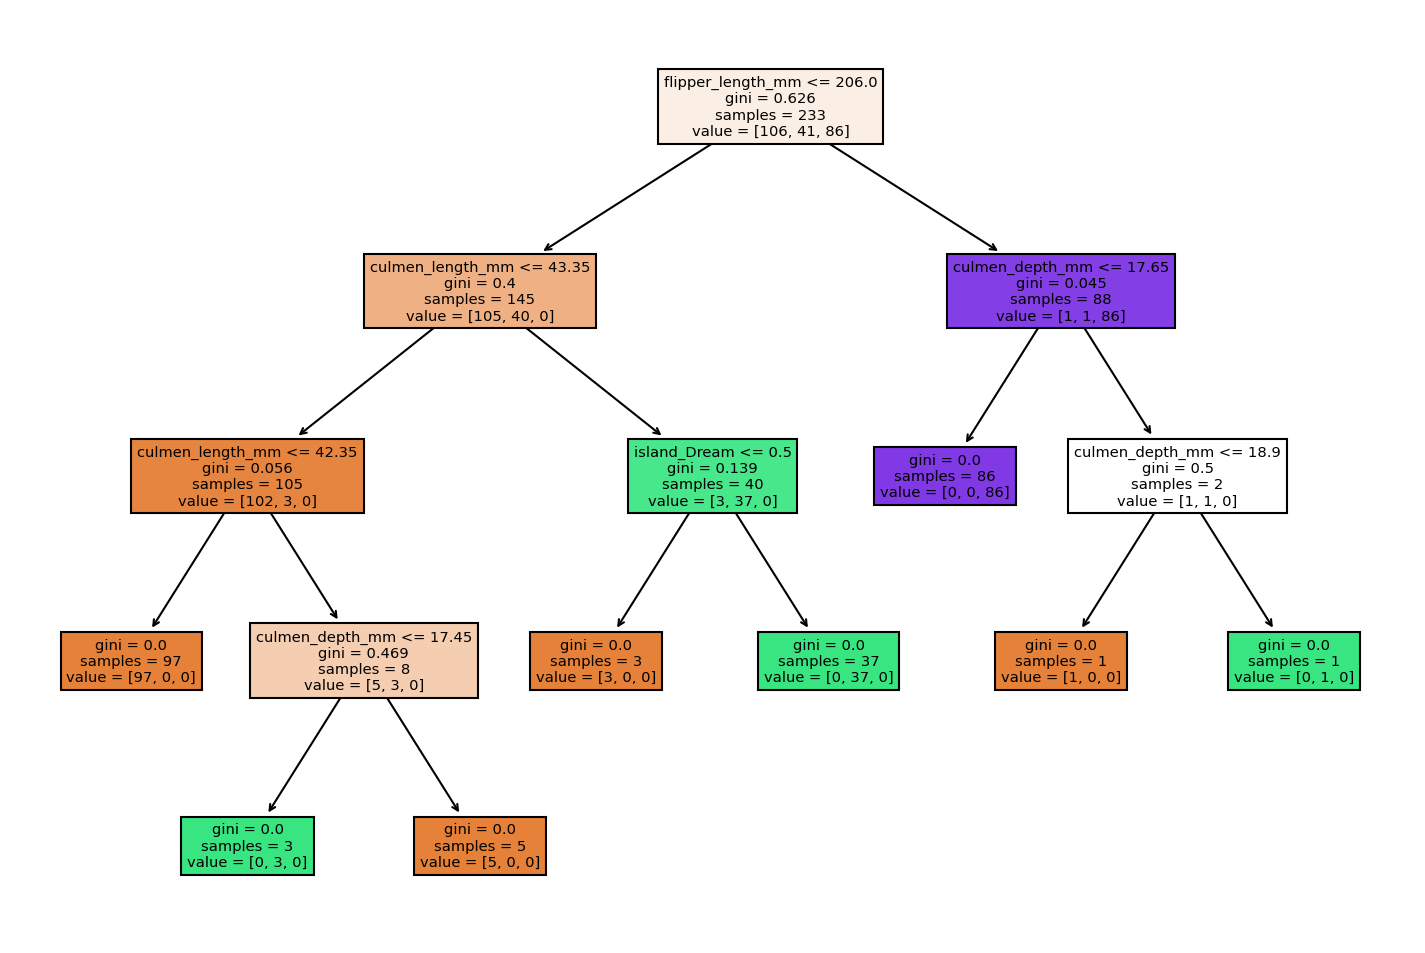

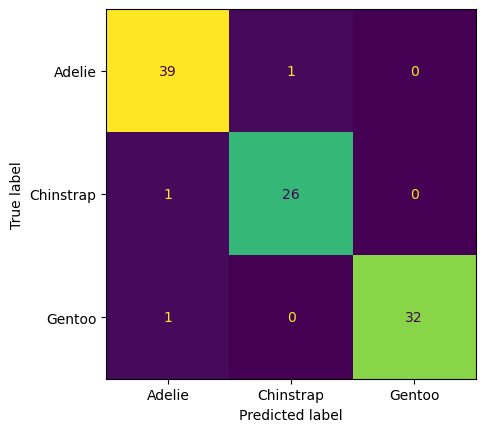

In [29]:
arb_def = DecisionTreeClassifier()
arb_def.fit(X_train,y_train)
reporte_modelo(arb_def)

### Profundidad máxima 2

              precision    recall  f1-score   support

      Adelie       0.87      0.97      0.92        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.92       100
   macro avg       0.93      0.91      0.91       100
weighted avg       0.92      0.92      0.92       100



                   Importancia de la característica
culmen_length_mm                           0.348861
culmen_depth_mm                            0.021971
flipper_length_mm                          0.629168
body_mass_g                                0.000000
island_Dream                               0.000000
island_Torgersen                           0.000000
sex_MALE                                   0.000000


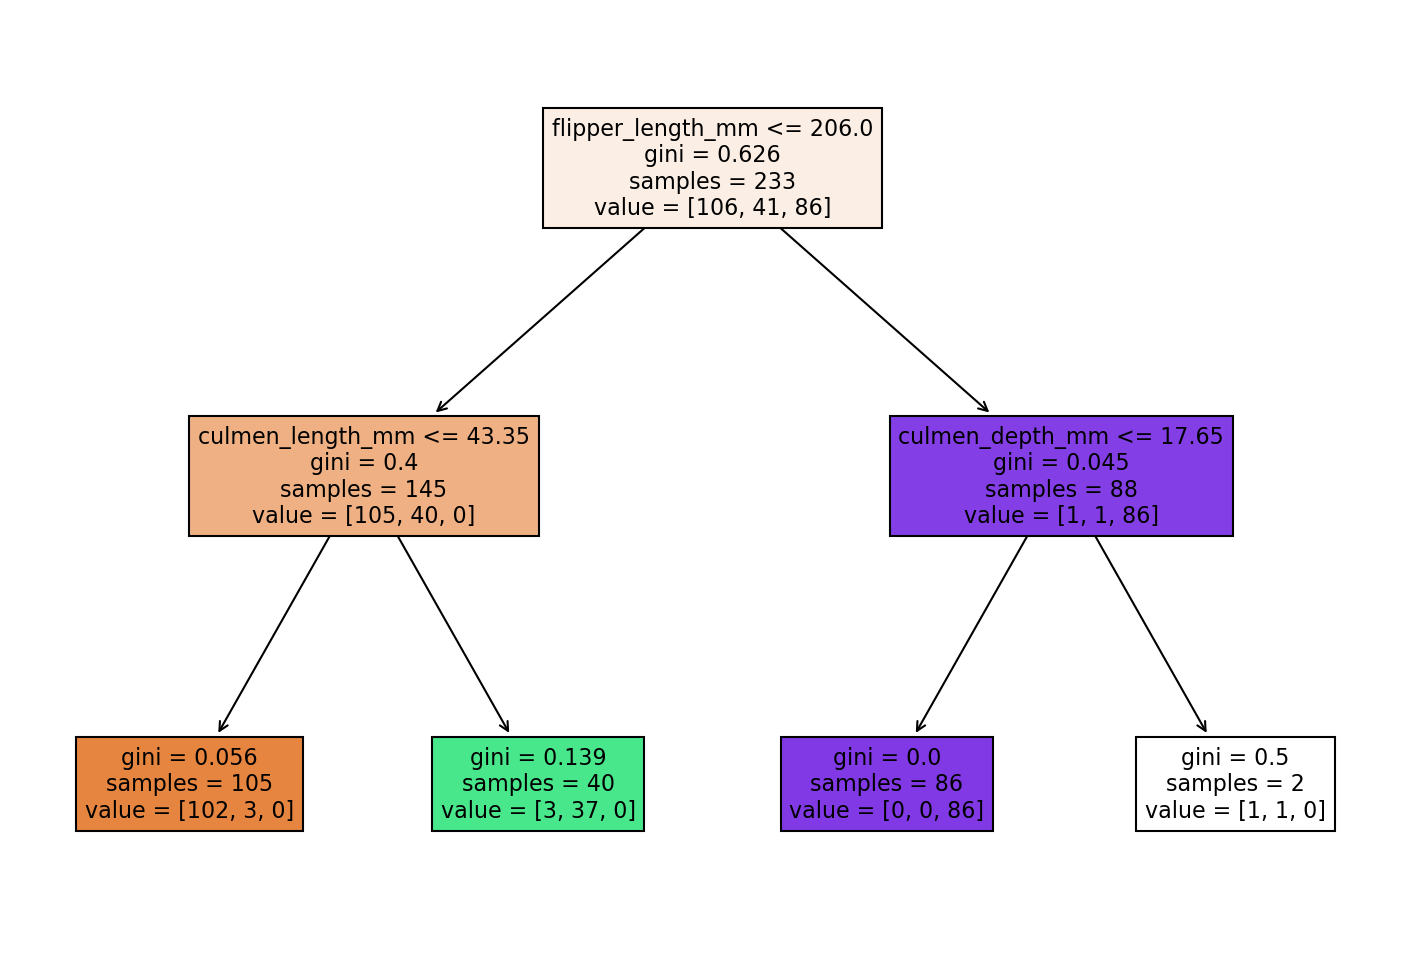

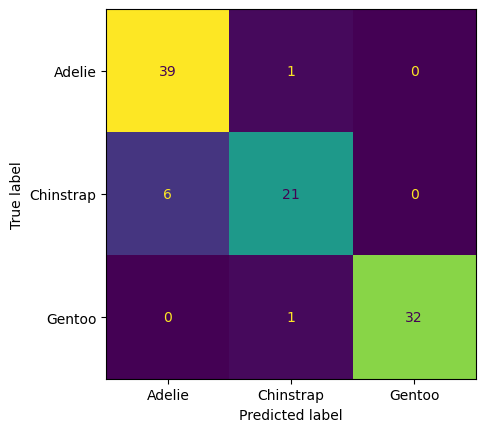

In [30]:
arb_pro = DecisionTreeClassifier(max_depth=2)
arb_pro.fit(X_train,y_train)
reporte_modelo(arb_pro)

### 3 Nodos Hoja Máximo 

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        40
   Chinstrap       0.91      0.78      0.84        27
      Gentoo       0.86      0.97      0.91        33

    accuracy                           0.91       100
   macro avg       0.91      0.90      0.90       100
weighted avg       0.91      0.91      0.91       100



                   Importancia de la característica
culmen_length_mm                           0.356698
culmen_depth_mm                            0.000000
flipper_length_mm                          0.643302
body_mass_g                                0.000000
island_Dream                               0.000000
island_Torgersen                           0.000000
sex_MALE                                   0.000000


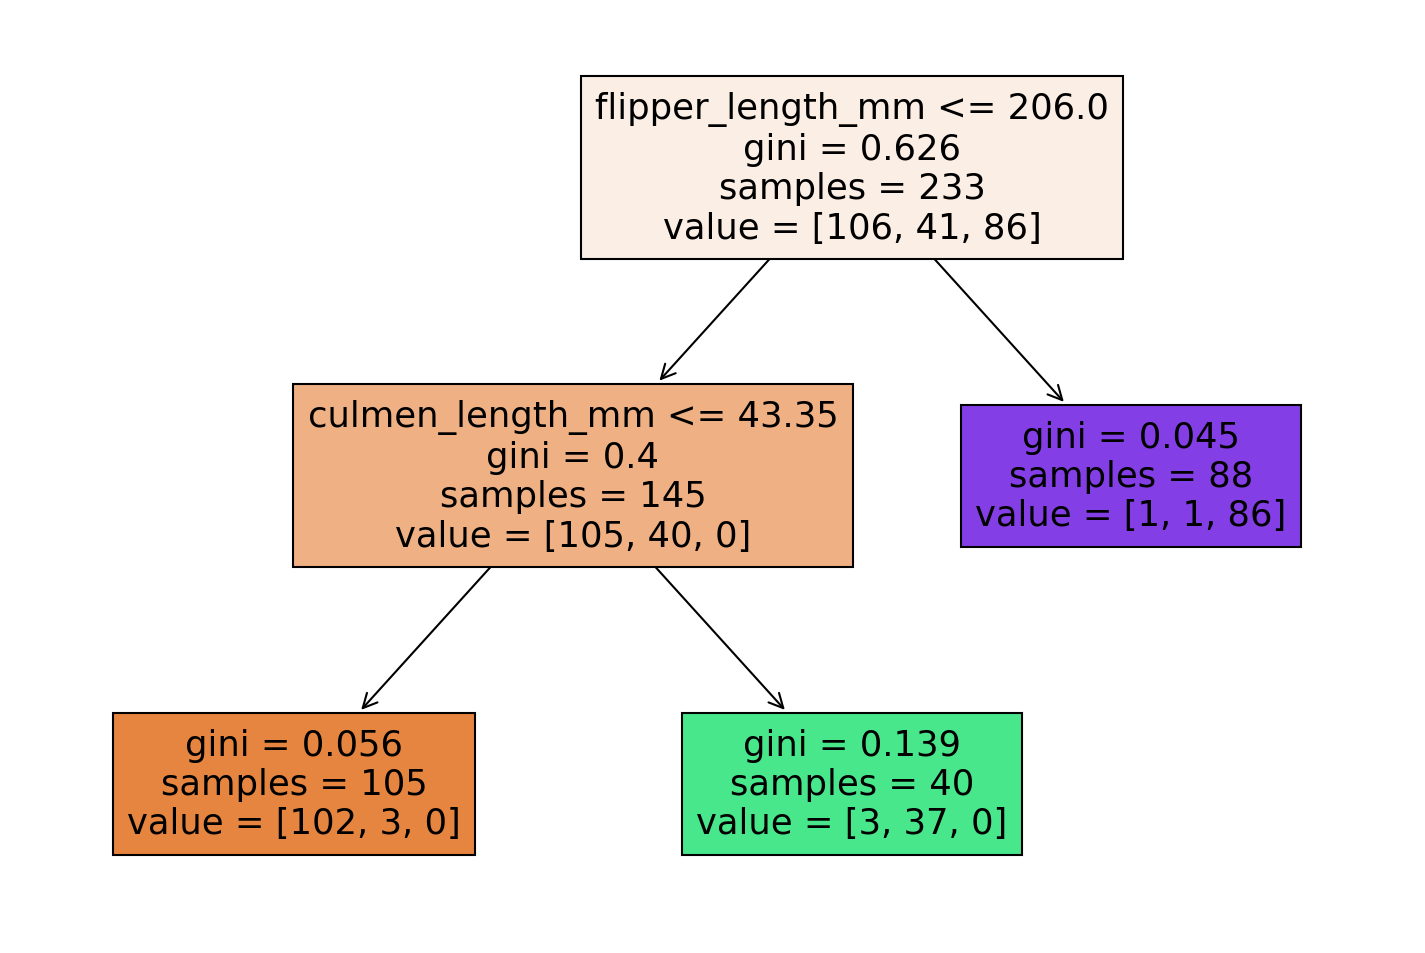

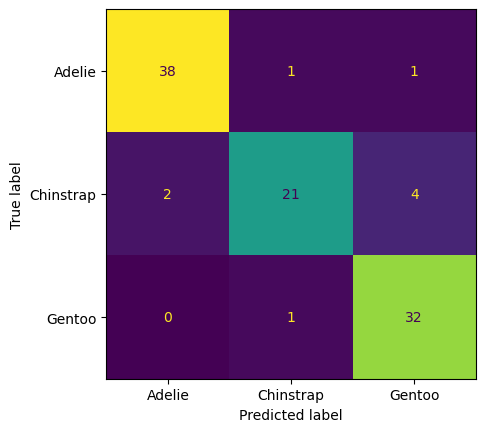

In [31]:
arb_nod_max = DecisionTreeClassifier(max_leaf_nodes=3)
arb_nod_max.fit(X_train,y_train)
reporte_modelo(arb_nod_max)

### Criterio

              precision    recall  f1-score   support

      Adelie       0.95      0.97      0.96        40
   Chinstrap       0.96      0.96      0.96        27
      Gentoo       1.00      0.97      0.98        33

    accuracy                           0.97       100
   macro avg       0.97      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



                   Importancia de la característica
culmen_length_mm                           0.275458
culmen_depth_mm                            0.054821
flipper_length_mm                          0.599325
body_mass_g                                0.000000
island_Dream                               0.070395
island_Torgersen                           0.000000
sex_MALE                                   0.000000


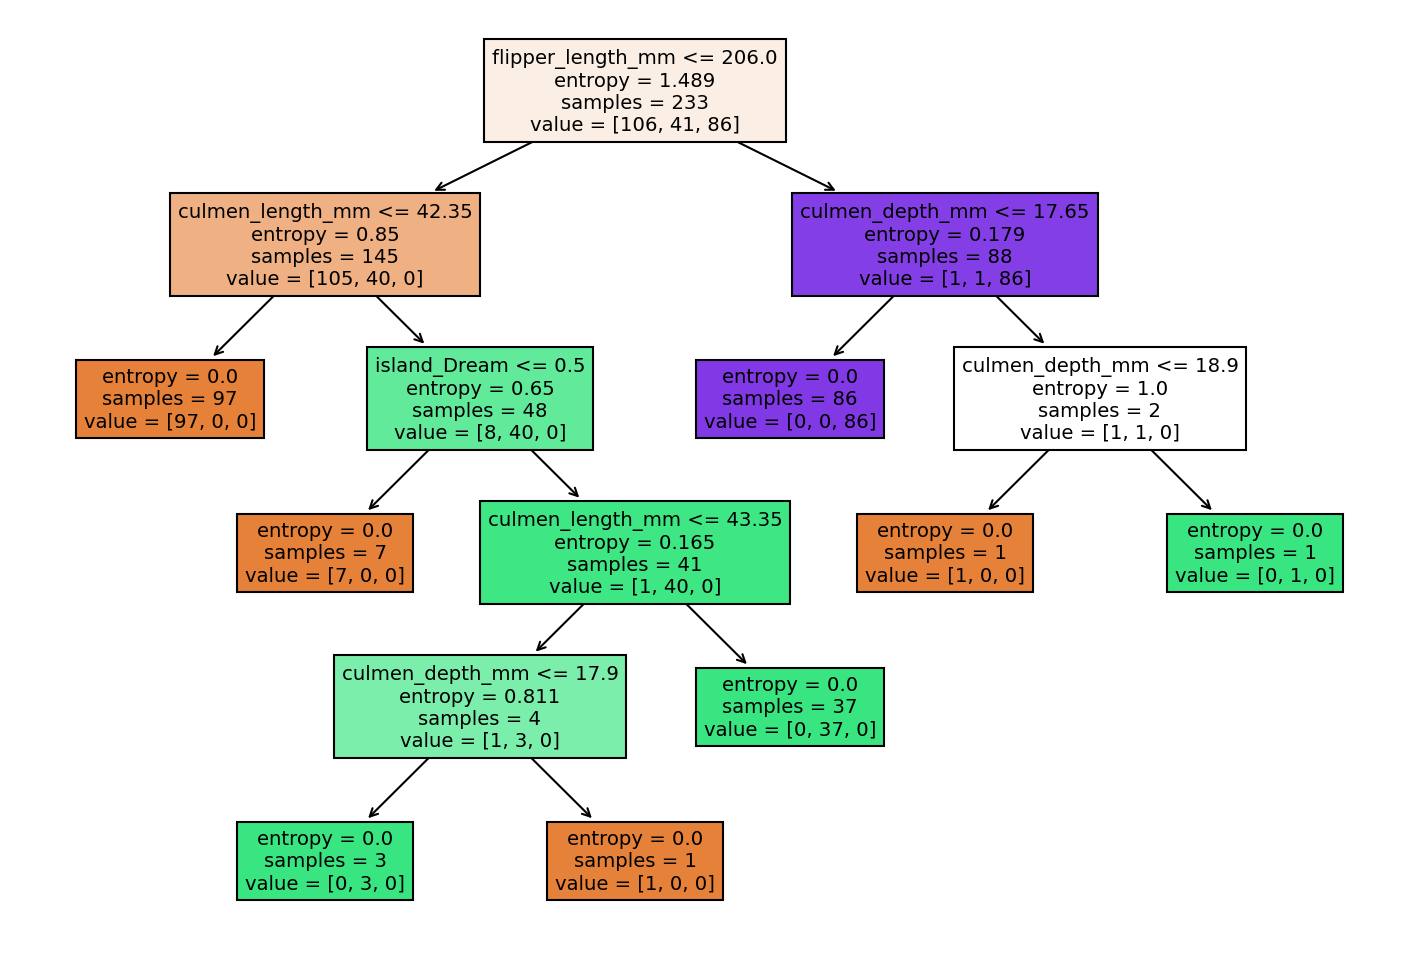

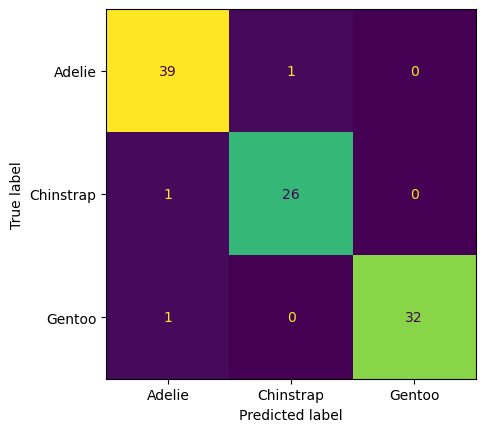

In [32]:
arb_nod_cri = DecisionTreeClassifier(criterion="entropy")
arb_nod_cri.fit(X_train,y_train)
reporte_modelo(arb_nod_cri)